In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

require('tidyverse')
require('DescTls')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse
Loading required package: DescTools


In [13]:
df_5_km = pd.read_csv('tracts_within_5_km_proposed_plant.csv')

In [14]:
df_5_km

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY_x,StateDesc,STATEABBR,LOCATION,...,IntPtLon,proposed_location,Band,distance_to_plant,num_energy_sources,plant_names,within_1_km,within_5_km,within_10_km,within_20_km
0,24.0,1.0,200.0,140000US24001000200,2.400100e+10,2.400100e+10,Allegany County,Maryland,MD,Census Tract 2; Allegany County; Maryland,...,-78.720550,1,1,0.000000,4,"AES Warrior Run Cogeneration Facility, AES War...",1,1,1,1
1,24.0,1.0,600.0,140000US24001000600,2.400100e+10,2.400100e+10,Allegany County,Maryland,MD,Census Tract 6; Allegany County; Maryland,...,-78.749768,0,2,4.824286,0,NaN,0,1,1,1
2,24.0,1.0,700.0,140000US24001000700,2.400100e+10,2.400100e+10,Allegany County,Maryland,MD,Census Tract 7; Allegany County; Maryland,...,-78.755822,0,2,4.358901,0,NaN,0,1,1,1
3,24.0,1.0,800.0,140000US24001000800,2.400100e+10,2.400100e+10,Allegany County,Maryland,MD,Census Tract 8; Allegany County; Maryland,...,-78.765327,0,2,4.434164,0,NaN,0,1,1,1
4,24.0,1.0,2200.0,140000US24001002200,2.400100e+10,2.400100e+10,Allegany County,Maryland,MD,Census Tract 22; Allegany County; Maryland,...,-79.021106,1,1,0.000000,0,NaN,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,24.0,510.0,270101.0,140000US24510270101,2.451027e+10,2.451027e+10,Baltimore city,Maryland,MD,Census Tract 2701.01; Baltimore city; Maryland,...,-76.567836,0,2,3.900884,0,NaN,0,1,1,1
306,24.0,510.0,270102.0,140000US24510270102,2.451027e+10,2.451027e+10,Baltimore city,Maryland,MD,Census Tract 2701.02; Baltimore city; Maryland,...,-76.559228,0,2,4.448382,0,NaN,0,1,1,1
307,24.0,510.0,270200.0,140000US24510270200,2.451027e+10,2.451027e+10,Baltimore city,Maryland,MD,Census Tract 2702; Baltimore city; Maryland,...,-76.573762,0,2,4.878732,0,NaN,0,1,1,1
308,24.0,510.0,280500.0,140000US24510280500,2.451028e+10,2.451028e+10,Baltimore city,Maryland,MD,Census Tract 2805; Baltimore city; Maryland,...,-76.600559,0,2,2.413641,0,NaN,0,1,1,1


In [15]:
df_5_km['Band'].value_counts()

Band
2    275
1     35
Name: count, dtype: int64

In [16]:
df_10_km = pd.read_csv('tracts_within_10_km_proposed_plant.csv')

In [17]:
df_10_km

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY_x,StateDesc,STATEABBR,LOCATION,...,IntPtLon,proposed_location,Band,distance_to_plant,num_energy_sources,plant_names,within_1_km,within_5_km,within_10_km,within_20_km
0,24.0,1.0,200.0,140000US24001000200,2.400100e+10,2.400100e+10,Allegany County,Maryland,MD,Census Tract 2; Allegany County; Maryland,...,-78.720550,1,1,0.000000,4,"AES Warrior Run Cogeneration Facility, AES War...",1,1,1,1
1,24.0,1.0,500.0,140000US24001000500,2.400100e+10,2.400100e+10,Allegany County,Maryland,MD,Census Tract 5; Allegany County; Maryland,...,-78.744133,0,3,6.323703,0,NaN,0,0,1,1
2,24.0,1.0,600.0,140000US24001000600,2.400100e+10,2.400100e+10,Allegany County,Maryland,MD,Census Tract 6; Allegany County; Maryland,...,-78.749768,0,2,4.824286,0,NaN,0,1,1,1
3,24.0,1.0,700.0,140000US24001000700,2.400100e+10,2.400100e+10,Allegany County,Maryland,MD,Census Tract 7; Allegany County; Maryland,...,-78.755822,0,2,4.358901,0,NaN,0,1,1,1
4,24.0,1.0,800.0,140000US24001000800,2.400100e+10,2.400100e+10,Allegany County,Maryland,MD,Census Tract 8; Allegany County; Maryland,...,-78.765327,0,2,4.434164,0,NaN,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,24.0,510.0,280402.0,140000US24510280402,2.451028e+10,2.451028e+10,Baltimore city,Maryland,MD,Census Tract 2804.02; Baltimore city; Maryland,...,-76.688944,0,3,7.408346,0,NaN,0,0,1,1
775,24.0,510.0,280403.0,140000US24510280403,2.451028e+10,2.451028e+10,Baltimore city,Maryland,MD,Census Tract 2804.03; Baltimore city; Maryland,...,-76.703723,0,3,8.561948,0,NaN,0,0,1,1
776,24.0,510.0,280404.0,140000US24510280404,2.451028e+10,2.451028e+10,Baltimore city,Maryland,MD,Census Tract 2804.04; Baltimore city; Maryland,...,-76.689863,0,3,7.107592,0,NaN,0,0,1,1
777,24.0,510.0,280500.0,140000US24510280500,2.451028e+10,2.451028e+10,Baltimore city,Maryland,MD,Census Tract 2805; Baltimore city; Maryland,...,-76.600559,0,2,2.413641,0,NaN,0,1,1,1


In [18]:
df_10_km['Band'].value_counts()

Band
3    469
2    275
1     35
Name: count, dtype: int64

In [19]:
df_20_km = pd.read_csv('tracts_within_20_km_proposed_plant.csv')

In [20]:
df_20_km

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY_x,StateDesc,STATEABBR,LOCATION,...,IntPtLon,proposed_location,Band,distance_to_plant,num_energy_sources,plant_names,within_1_km,within_5_km,within_10_km,within_20_km
0,24.0,1.0,200.0,140000US24001000200,2.400100e+10,2.400100e+10,Allegany County,Maryland,MD,Census Tract 2; Allegany County; Maryland,...,-78.720550,1,1,0.000000,4,"AES Warrior Run Cogeneration Facility, AES War...",1,1,1,1
1,24.0,1.0,500.0,140000US24001000500,2.400100e+10,2.400100e+10,Allegany County,Maryland,MD,Census Tract 5; Allegany County; Maryland,...,-78.744133,0,3,6.323703,0,NaN,0,0,1,1
2,24.0,1.0,600.0,140000US24001000600,2.400100e+10,2.400100e+10,Allegany County,Maryland,MD,Census Tract 6; Allegany County; Maryland,...,-78.749768,0,2,4.824286,0,NaN,0,1,1,1
3,24.0,1.0,700.0,140000US24001000700,2.400100e+10,2.400100e+10,Allegany County,Maryland,MD,Census Tract 7; Allegany County; Maryland,...,-78.755822,0,2,4.358901,0,NaN,0,1,1,1
4,24.0,1.0,800.0,140000US24001000800,2.400100e+10,2.400100e+10,Allegany County,Maryland,MD,Census Tract 8; Allegany County; Maryland,...,-78.765327,0,2,4.434164,0,NaN,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,24.0,510.0,280402.0,140000US24510280402,2.451028e+10,2.451028e+10,Baltimore city,Maryland,MD,Census Tract 2804.02; Baltimore city; Maryland,...,-76.688944,0,3,7.408346,0,NaN,0,0,1,1
1174,24.0,510.0,280403.0,140000US24510280403,2.451028e+10,2.451028e+10,Baltimore city,Maryland,MD,Census Tract 2804.03; Baltimore city; Maryland,...,-76.703723,0,3,8.561948,0,NaN,0,0,1,1
1175,24.0,510.0,280404.0,140000US24510280404,2.451028e+10,2.451028e+10,Baltimore city,Maryland,MD,Census Tract 2804.04; Baltimore city; Maryland,...,-76.689863,0,3,7.107592,0,NaN,0,0,1,1
1176,24.0,510.0,280500.0,140000US24510280500,2.451028e+10,2.451028e+10,Baltimore city,Maryland,MD,Census Tract 2805; Baltimore city; Maryland,...,-76.600559,0,2,2.413641,0,NaN,0,1,1,1


In [21]:
df_20_km['Band'].value_counts()

Band
3    469
4    399
2    275
1     35
Name: count, dtype: int64

In [8]:
%%R

df_5_km <- read.csv('tracts_within_5_km_proposed_plant.csv')

In [9]:
%%R

df_10_km <- read.csv('tracts_within_10_km_proposed_plant.csv')

In [10]:
%%R

df_20_km <- read.csv('tracts_within_20_km_proposed_plant.csv')

# Poverty and distance to proposed plant location

In [11]:
%%R

model <- lm(distance_to_plant ~ E_POV200, data=df_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_POV200, data = df_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9845 -0.8869  0.2672  1.1587  2.0313 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.9030349  0.1491844  19.459   <2e-16 ***
E_POV200    0.0009497  0.0040677   0.233    0.816    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.413 on 307 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.0001775,	Adjusted R-squared:  -0.003079 
F-statistic: 0.05451 on 1 and 307 DF,  p-value: 0.8156



In [22]:
%%R

model <- lm(distance_to_plant ~ E_POV200, data=df_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_POV200, data = df_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.2910 -1.7895  0.2407  2.0759  4.9659 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.443015   0.172099  37.438  < 2e-16 ***
E_POV200    -0.030147   0.005442  -5.539 4.16e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.566 on 775 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.03808,	Adjusted R-squared:  0.03684 
F-statistic: 30.68 on 1 and 775 DF,  p-value: 4.161e-08



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`). 



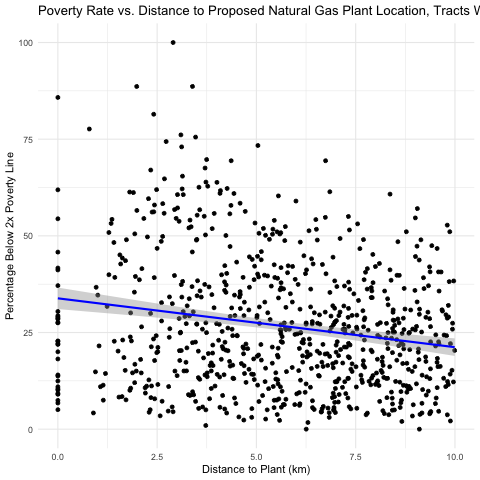

In [24]:
%%R

    ggplot(df_10_km) +
    aes(x=distance_to_plant, y=E_POV200) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "Poverty Rate vs. Distance to Proposed Natural Gas Plant Location, Tracts Within 10 Km",
            x = "Distance to Plant (km)",
            y = "Percentage Below 2x Poverty Line"
          ) +
          theme_minimal()

In [23]:
%%R

model <- lm(distance_to_plant ~ E_POV200, data=df_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_POV200, data = df_20_km)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.2505  -3.2282  -0.6022   2.8137  12.7573 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.712595   0.240869   44.48   <2e-16 ***
E_POV200    -0.091670   0.008377  -10.94   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.657 on 1173 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.09264,	Adjusted R-squared:  0.09186 
F-statistic: 119.8 on 1 and 1173 DF,  p-value: < 2.2e-16



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 3 rows containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`). 



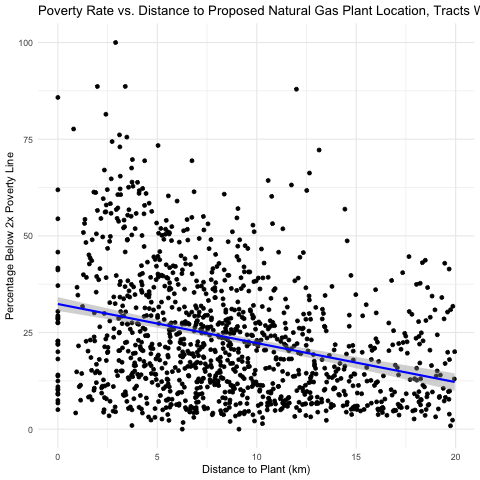

In [25]:
%%R

    ggplot(df_20_km) +
    aes(x=distance_to_plant, y=E_POV200) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "Poverty Rate vs. Distance to Proposed Natural Gas Plant Location, Tracts Within 20 Km",
            x = "Distance to Plant (km)",
            y = "Percentage Below 2x Poverty Line"
          ) +
          theme_minimal()

## There is a correlation between poverty and distance to proposed location for new gas plants, with a stronger correlation in the dataset up to 20km away from the plant compared to 10km

In [101]:
%%R
# Load the nnet package
library(nnet)

In [102]:
%%R

multinom_model <- multinom(Band ~ E_POV200, data = df_5_km)

# weights:  3 (2 variable)
initial  value 214.182479 
iter  10 value 108.295753
iter  10 value 108.295753
iter  10 value 108.295753
final  value 108.295753 
converged


In [103]:
%%R

summary(multinom_model)

Call:
multinom(formula = Band ~ E_POV200, data = df_5_km)

Coefficients:
                Values   Std. Err.
(Intercept) 1.68984249 0.324348964
E_POV200    0.01266626 0.009888955

Residual Deviance: 216.5915 
AIC: 220.5915 


In [105]:
%%R

multinom_model <- multinom(Band ~ E_POV200, data = df_10_km)
summary(multinom_model)

# weights:  9 (4 variable)
initial  value 853.621748 
iter  10 value 614.718491
iter  10 value 614.718490
final  value 614.718490 
converged
Call:
multinom(formula = Band ~ E_POV200, data = df_10_km)

Coefficients:
  (Intercept)    E_POV200
2    1.625080  0.01488693
3    2.877241 -0.01122159

Std. Errors:
  (Intercept)   E_POV200
2   0.3430459 0.01070368
3   0.3322291 0.01060594

Residual Deviance: 1229.437 
AIC: 1237.437 


In [106]:
%%R
# Get coefficients and standard errors
coefs <- summary(multinom_model)$coefficients
std_errs <- summary(multinom_model)$standard.errors

# Calculate z-values
z_vals <- coefs / std_errs

# Calculate p-values from z-values
p_vals <- 2 * (1 - pnorm(abs(z_vals)))

# View the results
z_vals
p_vals


   (Intercept)  E_POV200
2 2.166808e-06 0.1642790
3 0.000000e+00 0.2900337


## Band is not significant within the 10km dataset

In [107]:
%%R

multinom_model <- multinom(Band ~ E_POV200, data = df_20_km)
summary(multinom_model)

# weights:  12 (6 variable)
initial  value 1628.895874 
iter  10 value 1324.130625
final  value 1324.106515 
converged
Call:
multinom(formula = Band ~ E_POV200, data = df_20_km)

Coefficients:
  (Intercept)    E_POV200
2    1.638851  0.01442612
3    2.870711 -0.01094266
4    3.355312 -0.04216078

Std. Errors:
  (Intercept)   E_POV200
2   0.3393838 0.01054553
3   0.3288531 0.01045470
4   0.3315819 0.01093272

Residual Deviance: 2648.213 
AIC: 2660.213 


In [108]:
%%R
# Get coefficients and standard errors
coefs <- summary(multinom_model)$coefficients
std_errs <- summary(multinom_model)$standard.errors

# Calculate z-values
z_vals <- coefs / std_errs

# Calculate p-values from z-values
p_vals <- 2 * (1 - pnorm(abs(z_vals)))

# View the results
z_vals
p_vals


   (Intercept)     E_POV200
2 1.372874e-06 0.1713170291
3 0.000000e+00 0.2952498903
4 0.000000e+00 0.0001150767


## Only Band 4, compared to 1, is significant. 

In [109]:
%%R

model <- lm(E_POV200 ~ factor(Band), data=df_5_km)
summary(model)


Call:
lm(formula = E_POV200 ~ factor(Band), data = df_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-30.454 -16.342  -4.191  13.168  68.591 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     26.840      3.343   8.028 2.13e-14 ***
factor(Band)2    4.569      3.550   1.287    0.199    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.78 on 307 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.005365,	Adjusted R-squared:  0.002125 
F-statistic: 1.656 on 1 and 307 DF,  p-value: 0.1991



In [110]:
%%R

model <- lm(E_POV200 ~ factor(Band), data=df_10_km)
summary(model)


Call:
lm(formula = E_POV200 ~ factor(Band), data = df_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-30.454 -12.891  -2.108  10.084  68.591 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     26.840      2.802   9.578   <2e-16 ***
factor(Band)2    4.569      2.976   1.535    0.125    
factor(Band)3   -2.878      2.905  -0.991    0.322    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.58 on 774 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.0431,	Adjusted R-squared:  0.04063 
F-statistic: 17.43 on 2 and 774 DF,  p-value: 3.935e-08



In [111]:
%%R

model <- lm(E_POV200 ~ factor(Band), data=df_20_km)
summary(model)


Call:
lm(formula = E_POV200 ~ factor(Band), data = df_20_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-30.454 -11.466  -2.696   8.197  69.982 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     26.840      2.610  10.284  < 2e-16 ***
factor(Band)2    4.569      2.772   1.648  0.09954 .  
factor(Band)3   -2.878      2.706  -1.064  0.28775    
factor(Band)4   -8.901      2.722  -3.270  0.00111 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.44 on 1171 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.09664,	Adjusted R-squared:  0.09432 
F-statistic: 41.76 on 3 and 1171 DF,  p-value: < 2.2e-16



## This confirms what the earlier linear regression showed - not much difference in poverty rates within 5km of proposed plant locations, but poverty decreases after that with the correlation becoming more significant the further away from the plant within 20km

# % African American and proposed plant locations

In [27]:
%%R

model <- lm(distance_to_plant ~ E_AFAM, data=df_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_AFAM, data = df_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1977 -0.8817  0.2074  1.1469  2.1561 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.751107   0.119005  23.118   <2e-16 ***
E_AFAM      0.005013   0.002432   2.061   0.0401 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.402 on 308 degrees of freedom
Multiple R-squared:  0.01361,	Adjusted R-squared:  0.0104 
F-statistic: 4.249 on 1 and 308 DF,  p-value: 0.04012



In [28]:
%%R

model <- lm(distance_to_plant ~ E_AFAM, data=df_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_AFAM, data = df_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8609 -2.0143  0.1192  2.1457  4.4949 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.469317   0.146764  37.266   <2e-16 ***
E_AFAM      0.004394   0.003006   1.462    0.144    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.613 on 776 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.002747,	Adjusted R-squared:  0.001461 
F-statistic: 2.137 on 1 and 776 DF,  p-value: 0.1442



In [29]:
%%R

model <- lm(distance_to_plant ~ E_AFAM, data=df_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_AFAM, data = df_20_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.1987 -3.6482 -0.5173  3.0799 11.8660 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.206419   0.214366  42.947  < 2e-16 ***
E_AFAM      -0.019400   0.004655  -4.167 3.31e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.853 on 1175 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.01456,	Adjusted R-squared:  0.01373 
F-statistic: 17.37 on 1 and 1175 DF,  p-value: 3.308e-05



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 1 row containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 1 row containing missing values or values outside the scale range
(`geom_point()`). 



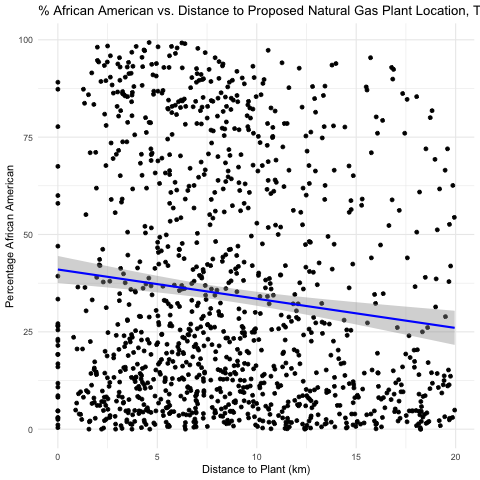

In [30]:
%%R

    ggplot(df_20_km) +
    aes(x=distance_to_plant, y=E_AFAM) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "% African American vs. Distance to Proposed Natural Gas Plant Location, Tracts Within 20 Km",
            x = "Distance to Plant (km)",
            y = "Percentage African American"
          ) +
          theme_minimal()

## Correlation between % African American and proposed plant location only exists for tracts within 20km

# % Hispanic and proposed plant locations

In [89]:
%%R

model <- lm(distance_to_plant ~ E_HISP, data=df_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_HISP, data = df_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2595 -0.8513  0.2608  1.1199  2.1299 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.824988   0.101535  27.823   <2e-16 ***
E_HISP      0.009426   0.005459   1.727   0.0853 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.405 on 308 degrees of freedom
Multiple R-squared:  0.009586,	Adjusted R-squared:  0.00637 
F-statistic: 2.981 on 1 and 308 DF,  p-value: 0.08525



In [90]:
%%R

model <- lm(distance_to_plant ~ E_HISP, data=df_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_HISP, data = df_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6650 -1.9883  0.0978  2.1484  4.3540 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.667984   0.119848  47.293   <2e-16 ***
E_HISP      -0.002743   0.006113  -0.449    0.654    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.616 on 776 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.0002594,	Adjusted R-squared:  -0.001029 
F-statistic: 0.2014 on 1 and 776 DF,  p-value: 0.6538



In [91]:
%%R

model <- lm(distance_to_plant ~ E_HISP, data=df_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_HISP, data = df_20_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.9145 -3.6861 -0.5693  3.0430 12.3715 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.95635    0.18411  48.648  < 2e-16 ***
E_HISP      -0.03801    0.01061  -3.584 0.000352 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.862 on 1175 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.01081,	Adjusted R-squared:  0.009971 
F-statistic: 12.84 on 1 and 1175 DF,  p-value: 0.0003525



In [31]:
%%R

model <- lm(distance_to_plant ~ E_UNEMP, data=df_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_UNEMP, data = df_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2946 -0.9017  0.2526  1.1704  2.1490 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.75247    0.11879  23.171   <2e-16 ***
E_UNEMP      0.02884    0.01409   2.046   0.0416 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.404 on 307 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.01345,	Adjusted R-squared:  0.01024 
F-statistic: 4.186 on 1 and 307 DF,  p-value: 0.0416



## % Hispanic is not strongly correlated with distance to proposed plants

In [32]:
%%R

model <- lm(distance_to_plant ~ E_UNEMP, data=df_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_UNEMP, data = df_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7378 -1.9732  0.1064  2.1421  4.3592 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.74675    0.15446   37.21   <2e-16 ***
E_UNEMP     -0.01800    0.02023   -0.89    0.374    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.615 on 775 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.001021,	Adjusted R-squared:  -0.0002681 
F-statistic: 0.792 on 1 and 775 DF,  p-value: 0.3738



In [33]:
%%R

model <- lm(distance_to_plant ~ E_UNEMP, data=df_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_UNEMP, data = df_20_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2612 -3.5607 -0.6016  3.1346 12.2372 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.33066    0.23896  39.047  < 2e-16 ***
E_UNEMP     -0.13886    0.03363  -4.129 3.91e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.853 on 1173 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.01432,	Adjusted R-squared:  0.01348 
F-statistic: 17.05 on 1 and 1173 DF,  p-value: 3.907e-05



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 3 rows containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`). 



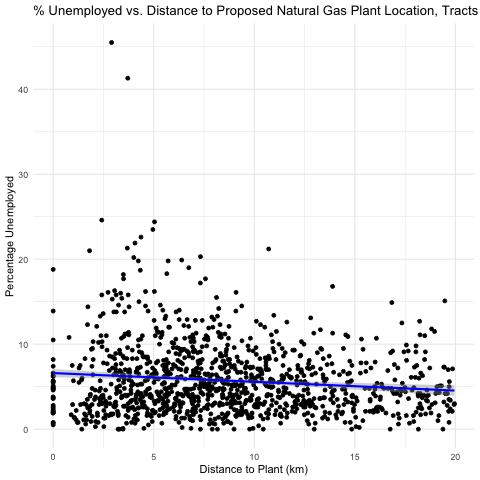

In [34]:
%%R

    ggplot(df_20_km) +
    aes(x=distance_to_plant, y=E_UNEMP) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "% Unemployed vs. Distance to Proposed Natural Gas Plant Location, Tracts Within 20 Km",
            x = "Distance to Plant (km)",
            y = "Percentage Unemployed"
          ) +
          theme_minimal()

## % Unemployed only correlates with tracts within 20km

# % No high school diploma and proposed plant locations

In [39]:
%%R

model <- lm(distance_to_plant ~ E_NOHSDP, data=df_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_NOHSDP, data = df_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5426 -0.9235  0.2206  1.1133  2.1723 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.742595   0.124734  21.988   <2e-16 ***
E_NOHSDP    0.015095   0.007593   1.988   0.0477 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.402 on 308 degrees of freedom
Multiple R-squared:  0.01267,	Adjusted R-squared:  0.009464 
F-statistic: 3.952 on 1 and 308 DF,  p-value: 0.04769



In [40]:
%%R

model <- lm(distance_to_plant ~ E_NOHSDP, data=df_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_NOHSDP, data = df_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9367 -1.8710  0.1807  2.1920  4.6003 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.997091   0.145579  41.195  < 2e-16 ***
E_NOHSDP    -0.031800   0.009811  -3.241  0.00124 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.599 on 776 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.01336,	Adjusted R-squared:  0.01209 
F-statistic: 10.51 on 1 and 776 DF,  p-value: 0.00124



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 1 row containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 1 row containing missing values or values outside the scale range
(`geom_point()`). 



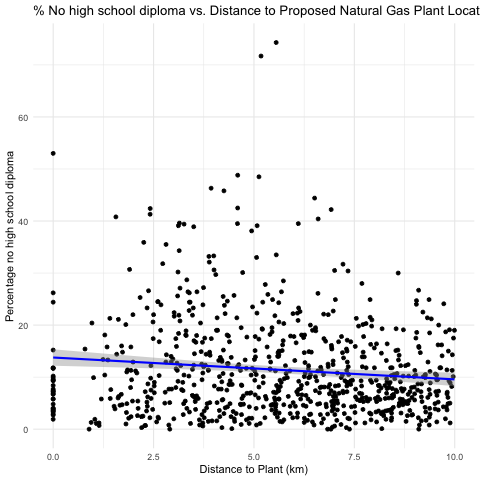

In [42]:
%%R

    ggplot(df_10_km) +
    aes(x=distance_to_plant, y=E_NOHSDP) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "% No high school diploma vs. Distance to Proposed Natural Gas Plant Location, Tracts Within 10 Km",
            x = "Distance to Plant (km)",
            y = "Percentage no high school diploma"
          ) +
          theme_minimal()

In [41]:
%%R

model <- lm(distance_to_plant ~ E_NOHSDP, data=df_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_NOHSDP, data = df_20_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6699 -3.4080 -0.5761  2.9437 13.8061 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.93532    0.21388  46.452   <2e-16 ***
E_NOHSDP    -0.13968    0.01628  -8.578   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.742 on 1175 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.05894,	Adjusted R-squared:  0.05814 
F-statistic: 73.59 on 1 and 1175 DF,  p-value: < 2.2e-16



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 1 row containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 1 row containing missing values or values outside the scale range
(`geom_point()`). 



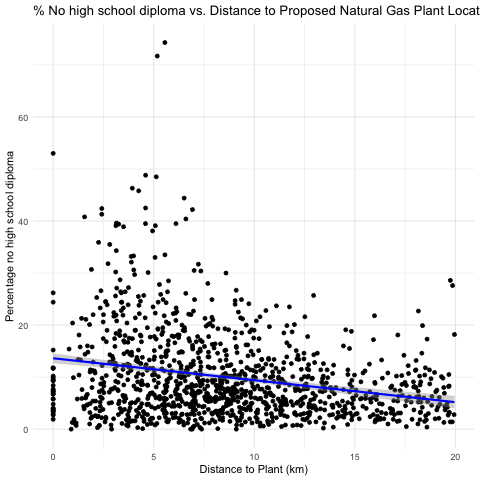

In [38]:
%%R

    ggplot(df_20_km) +
    aes(x=distance_to_plant, y=E_NOHSDP) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "% No high school diploma vs. Distance to Proposed Natural Gas Plant Location, Tracts Within 20 Km",
            x = "Distance to Plant (km)",
            y = "Percentage no high school diploma"
          ) +
          theme_minimal()

## Stronger correlation for tracts within 20km for no high school diploma, correlation still exists for 10km but not 5km

In [44]:
%%R

model <- lm(distance_to_plant ~ E_UNINSUR, data=df_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_UNINSUR, data = df_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5549 -0.8323  0.1975  1.0586  2.1311 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.70527    0.11536  23.450  < 2e-16 ***
E_UNINSUR    0.03255    0.01199   2.716  0.00699 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.397 on 307 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.02346,	Adjusted R-squared:  0.02028 
F-statistic: 7.375 on 1 and 307 DF,  p-value: 0.006989



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 1 row containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 1 row containing missing values or values outside the scale range
(`geom_point()`). 



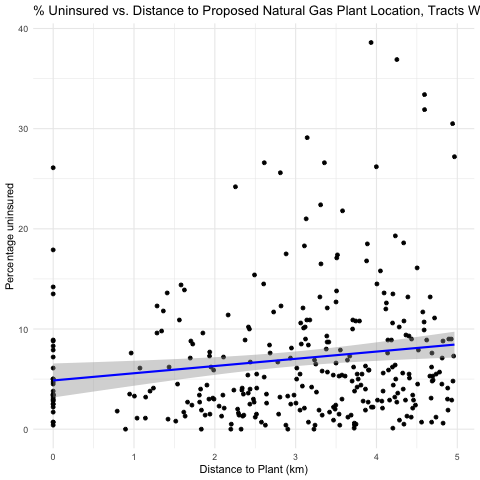

In [48]:
%%R

    ggplot(df_5_km) +
    aes(x=distance_to_plant, y=E_UNINSUR) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "% Uninsured vs. Distance to Proposed Natural Gas Plant Location, Tracts Within 5 Km",
            x = "Distance to Plant (km)",
            y = "Percentage uninsured"
          ) +
          theme_minimal()

In [45]:
%%R

model <- lm(distance_to_plant ~ E_UNINSUR, data=df_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_UNINSUR, data = df_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7209 -1.9943  0.1365  2.1351  4.3561 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.72603    0.13400  42.731   <2e-16 ***
E_UNINSUR   -0.01271    0.01375  -0.925    0.355    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.615 on 775 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.001102,	Adjusted R-squared:  -0.0001871 
F-statistic: 0.8549 on 1 and 775 DF,  p-value: 0.3555



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`). 



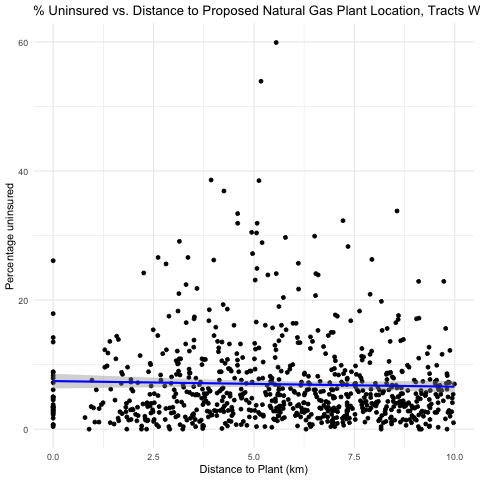

In [49]:
%%R

    ggplot(df_10_km) +
    aes(x=distance_to_plant, y=E_UNINSUR) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "% Uninsured vs. Distance to Proposed Natural Gas Plant Location, Tracts Within 10 Km",
            x = "Distance to Plant (km)",
            y = "Percentage uninsured"
          ) +
          theme_minimal()

In [46]:
%%R

model <- lm(distance_to_plant ~ E_UNINSUR, data=df_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_UNINSUR, data = df_20_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2332 -3.5254 -0.6215  3.0243 12.4961 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.28092    0.20183   45.98  < 2e-16 ***
E_UNINSUR   -0.11943    0.02315   -5.16  2.9e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.834 on 1173 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.02219,	Adjusted R-squared:  0.02136 
F-statistic: 26.62 on 1 and 1173 DF,  p-value: 2.901e-07



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 3 rows containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`). 



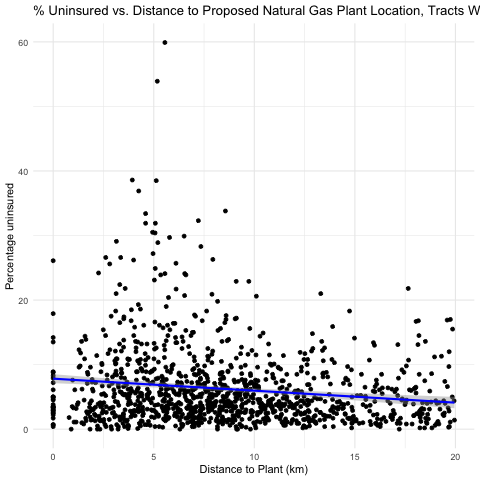

In [50]:
%%R

    ggplot(df_20_km) +
    aes(x=distance_to_plant, y=E_UNINSUR) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "% Uninsured vs. Distance to Proposed Natural Gas Plant Location, Tracts Within 20 Km",
            x = "Distance to Plant (km)",
            y = "Percentage uninsured"
          ) +
          theme_minimal()

## Within 5km, uninsurance goes up a little further away from the plant. Within 10 and 20km, it goes down.

# Renters and proposed plant locations

In [52]:
%%R

model <- lm(distance_to_plant ~ E_RENTER, data=df_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_RENTER, data = df_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9585 -0.8915  0.2733  1.1588  2.0484 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.9625127  0.1616810  18.323   <2e-16 ***
E_RENTER    -0.0006912  0.0032168  -0.215     0.83    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.414 on 307 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.0001504,	Adjusted R-squared:  -0.003106 
F-statistic: 0.04617 on 1 and 307 DF,  p-value: 0.83



In [53]:
%%R

model <- lm(distance_to_plant ~ E_RENTER, data=df_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_RENTER, data = df_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3162 -1.8294  0.2471  2.0832  4.9898 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.437639   0.166382  38.692  < 2e-16 ***
E_RENTER    -0.020944   0.003631  -5.769 1.15e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.562 on 775 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.04117,	Adjusted R-squared:  0.03994 
F-statistic: 33.28 on 1 and 775 DF,  p-value: 1.154e-08



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 1 row containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 1 row containing missing values or values outside the scale range
(`geom_point()`). 



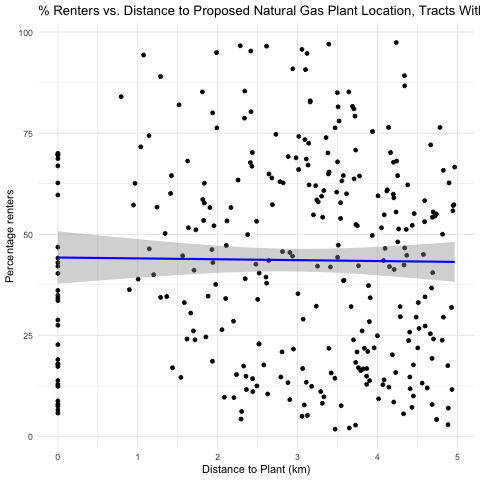

In [57]:
%%R

    ggplot(df_5_km) +
    aes(x=distance_to_plant, y=E_RENTER) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "% Renters vs. Distance to Proposed Natural Gas Plant Location, Tracts Within 5 Km",
            x = "Distance to Plant (km)",
            y = "Percentage renters"
          ) +
          theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`). 



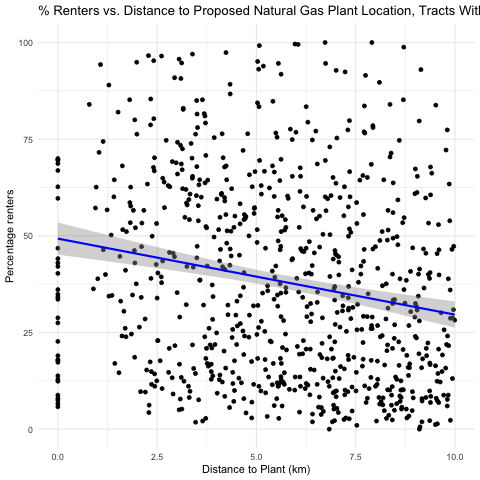

In [56]:
%%R

    ggplot(df_10_km) +
    aes(x=distance_to_plant, y=E_RENTER) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "% Renters vs. Distance to Proposed Natural Gas Plant Location, Tracts Within 10 Km",
            x = "Distance to Plant (km)",
            y = "Percentage renters"
          ) +
          theme_minimal()

In [54]:
%%R

model <- lm(distance_to_plant ~ E_RENTER, data=df_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_RENTER, data = df_20_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.9293 -3.4488 -0.7067  2.9264 13.0114 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.21002    0.23338  43.748   <2e-16 ***
E_RENTER    -0.04840    0.00544  -8.896   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.732 on 1173 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.0632,	Adjusted R-squared:  0.06241 
F-statistic: 79.14 on 1 and 1173 DF,  p-value: < 2.2e-16



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 3 rows containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`). 



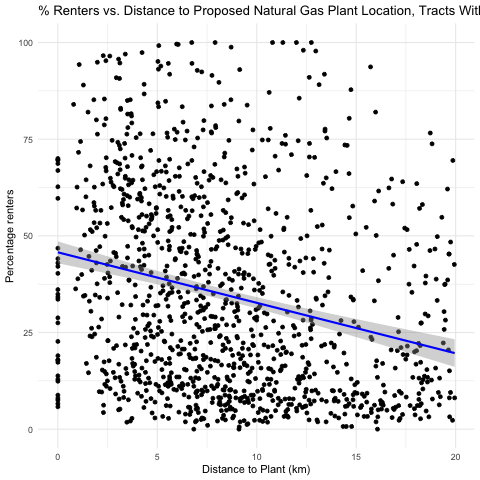

In [55]:
%%R

    ggplot(df_20_km) +
    aes(x=distance_to_plant, y=E_RENTER) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "% Renters vs. Distance to Proposed Natural Gas Plant Location, Tracts Within 20 Km",
            x = "Distance to Plant (km)",
            y = "Percentage renters"
          ) +
          theme_minimal()

## Not much correlation within 5km, but in 10km and even stronger in 20km, the further away from a plant, the less likely residents are to be renters

# % of People who Speak English 'Less Than Well' and Proposed Plant Locations

In [58]:
%%R

model <- lm(distance_to_plant ~ E_LIMENG, data=df_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_LIMENG, data = df_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1753 -0.8625  0.2364  1.0923  2.1359 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.81892    0.09302  30.306   <2e-16 ***
E_LIMENG     0.02828    0.01195   2.367   0.0186 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.399 on 308 degrees of freedom
Multiple R-squared:  0.01786,	Adjusted R-squared:  0.01468 
F-statistic: 5.602 on 1 and 308 DF,  p-value: 0.01856



In [59]:
%%R

model <- lm(distance_to_plant ~ E_LIMENG, data=df_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_LIMENG, data = df_10_km)

Residuals:
   Min     1Q Median     3Q    Max 
-5.687 -1.990  0.133  2.142  4.320 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.68711    0.10949   51.94   <2e-16 ***
E_LIMENG    -0.01256    0.01350   -0.93    0.353    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.615 on 776 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.001113,	Adjusted R-squared:  -0.0001743 
F-statistic: 0.8646 on 1 and 776 DF,  p-value: 0.3527



In [60]:
%%R

model <- lm(distance_to_plant ~ E_LIMENG, data=df_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_LIMENG, data = df_20_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.9353 -3.6074 -0.4914  3.0697 12.1380 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.93527    0.16510  54.119  < 2e-16 ***
E_LIMENG    -0.11148    0.02385  -4.674 3.29e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.844 on 1175 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.01826,	Adjusted R-squared:  0.01742 
F-statistic: 21.85 on 1 and 1175 DF,  p-value: 3.291e-06



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 1 row containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 1 row containing missing values or values outside the scale range
(`geom_point()`). 



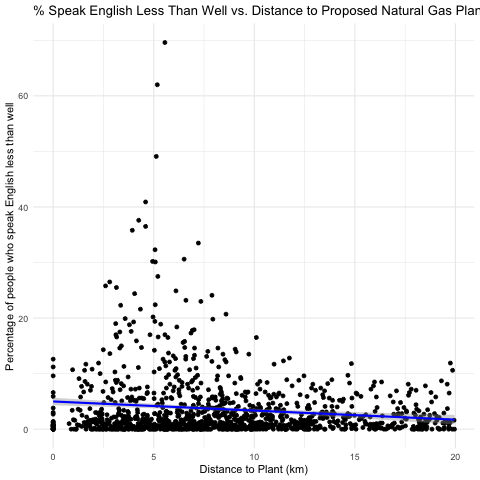

In [61]:
%%R

    ggplot(df_20_km) +
    aes(x=distance_to_plant, y=E_LIMENG) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "% Speak English Less Than Well vs. Distance to Proposed Natural Gas Plant Location, Tracts Within 20 Km",
            x = "Distance to Plant (km)",
            y = "Percentage of people who speak English less than well"
          ) +
          theme_minimal()

## Only correlation is in 20km with % who speak English less than well

# Age 17 and younger vs. proposed plant location

In [129]:
%%R

model <- lm(distance_to_plant ~ EPL_AGE17, data=df_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ EPL_AGE17, data = df_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1999 -0.8692  0.2396  1.1297  2.1824 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.6789     0.1519  17.631   <2e-16 ***
EPL_AGE17     0.5307     0.2698   1.967   0.0501 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.403 on 308 degrees of freedom
Multiple R-squared:  0.01241,	Adjusted R-squared:  0.009201 
F-statistic:  3.87 on 1 and 308 DF,  p-value: 0.05006



In [130]:
%%R

model <- lm(distance_to_plant ~ EPL_AGE17, data=df_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ EPL_AGE17, data = df_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.0126 -2.0063  0.1626  2.1526  4.6120 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.2462     0.1896  27.667   <2e-16 ***
EPL_AGE17     0.7807     0.3317   2.353   0.0188 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.607 on 776 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.007087,	Adjusted R-squared:  0.005808 
F-statistic: 5.539 on 1 and 776 DF,  p-value: 0.01885



In [131]:
%%R

model <- lm(distance_to_plant ~ EPL_AGE17, data=df_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ EPL_AGE17, data = df_20_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2244 -3.7549 -0.6361  3.2021 11.8005 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.8013     0.3004  25.971  < 2e-16 ***
EPL_AGE17     1.4496     0.5228   2.773  0.00565 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.873 on 1175 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.006501,	Adjusted R-squared:  0.005655 
F-statistic: 7.688 on 1 and 1175 DF,  p-value: 0.005645



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 1 row containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 1 row containing missing values or values outside the scale range
(`geom_point()`). 



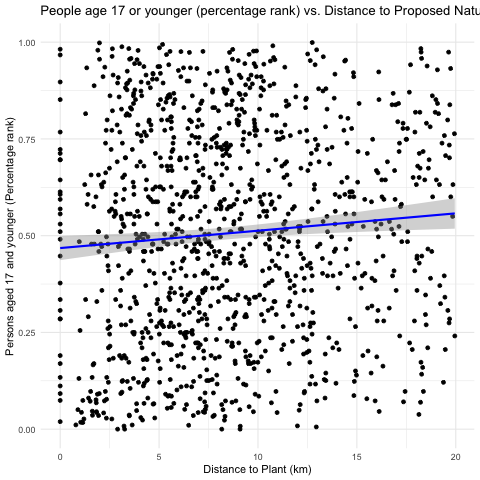

In [133]:
%%R

    ggplot(df_20_km) +
    aes(x=distance_to_plant, y=EPL_AGE17) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "People age 17 or younger (percentage rank) vs. Distance to Proposed Natural Gas Plant Location, Tracts Within 20 Km",
            x = "Distance to Plant (km)",
            y = "Persons aged 17 and younger (Percentage rank)"
          ) +
          theme_minimal()

# Age 65 and older vs. proposed plant location

In [128]:
%%R

model <- lm(distance_to_plant ~ EPL_AGE65, data=df_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ EPL_AGE65, data = df_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0673 -0.8742  0.2989  1.0946  2.1501 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.8035     0.1453  19.297   <2e-16 ***
EPL_AGE65     0.3059     0.2855   1.072    0.285    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.409 on 308 degrees of freedom
Multiple R-squared:  0.003714,	Adjusted R-squared:  0.0004794 
F-statistic: 1.148 on 1 and 308 DF,  p-value: 0.2848



In [127]:
%%R

model <- lm(distance_to_plant ~ EPL_AGE65, data=df_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ EPL_AGE65, data = df_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.0325 -1.9884  0.1872  2.1965  4.5436 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.2039     0.1795  28.998  < 2e-16 ***
EPL_AGE65     0.9606     0.3420   2.809  0.00509 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.603 on 776 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.01007,	Adjusted R-squared:  0.008791 
F-statistic: 7.891 on 1 and 776 DF,  p-value: 0.005093



In [126]:
%%R

model <- lm(distance_to_plant ~ EPL_AGE65, data=df_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ EPL_AGE65, data = df_20_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2803 -3.7573 -0.6166  3.1650 12.1577 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.6633     0.2784  27.529  < 2e-16 ***
EPL_AGE65     1.8748     0.5152   3.639 0.000286 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.861 on 1175 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.01114,	Adjusted R-squared:  0.0103 
F-statistic: 13.24 on 1 and 1175 DF,  p-value: 0.0002857



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 1 row containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 1 row containing missing values or values outside the scale range
(`geom_point()`). 



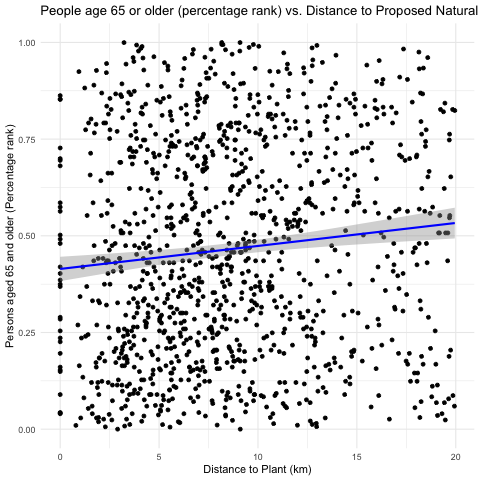

In [134]:
%%R

    ggplot(df_20_km) +
    aes(x=distance_to_plant, y=EPL_AGE65) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "People age 65 or older (percentage rank) vs. Distance to Proposed Natural Gas Plant Location, Tracts Within 20 Km",
            x = "Distance to Plant (km)",
            y = "Persons aged 65 and older (Percentage rank)"
          ) +
          theme_minimal()

## Tracts further away from proposed plant locations have both more young people and more old people

In [135]:
%%R

model <- lm(distance_to_plant ~ E_IMPWTR, data=df_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_IMPWTR, data = df_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9860 -0.8866  0.2515  1.1490  2.4740 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.1785     0.4381   4.973  1.1e-06 ***
E_IMPWTR      0.8075     0.4607   1.753   0.0807 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.404 on 308 degrees of freedom
Multiple R-squared:  0.009875,	Adjusted R-squared:  0.00666 
F-statistic: 3.072 on 1 and 308 DF,  p-value: 0.08065



In [136]:
%%R

model <- lm(distance_to_plant ~ E_IMPWTR, data=df_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_IMPWTR, data = df_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7089 -2.0030  0.0924  2.1303  5.4752 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.1325     0.6458   6.400 2.69e-10 ***
E_IMPWTR      1.5763     0.6705   2.351    0.019 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.605 on 777 degrees of freedom
Multiple R-squared:  0.007063,	Adjusted R-squared:  0.005785 
F-statistic: 5.527 on 1 and 777 DF,  p-value: 0.01897



`geom_smooth()` using formula = 'y ~ x'


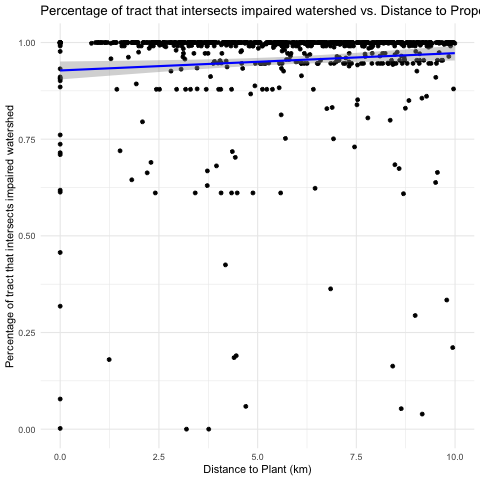

In [139]:
%%R

    ggplot(df_10_km) +
    aes(x=distance_to_plant, y=E_IMPWTR) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "Percentage of tract that intersects impaired watershed vs. Distance to Proposed Natural Gas Plant Location, Tracts Within 10 Km",
            x = "Distance to Plant (km)",
            y = "Percentage of tract that intersects impaired watershed"
          ) +
          theme_minimal()

In [137]:
%%R

model <- lm(distance_to_plant ~ E_IMPWTR, data=df_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_IMPWTR, data = df_20_km)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.4261  -3.7146  -0.6393   3.0481  11.5087 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  10.4301     0.9279  11.241   <2e-16 ***
E_IMPWTR     -2.0063     0.9696  -2.069   0.0388 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.878 on 1176 degrees of freedom
Multiple R-squared:  0.003627,	Adjusted R-squared:  0.00278 
F-statistic: 4.281 on 1 and 1176 DF,  p-value: 0.03875



`geom_smooth()` using formula = 'y ~ x'


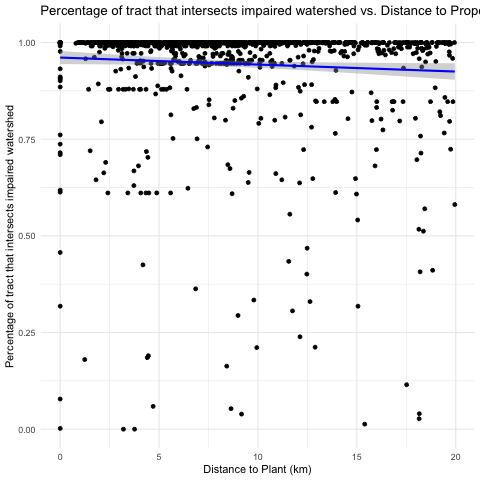

In [140]:
%%R

    ggplot(df_20_km) +
    aes(x=distance_to_plant, y=E_IMPWTR) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "Percentage of tract that intersects impaired watershed vs. Distance to Proposed Natural Gas Plant Location, Tracts Within 20 Km",
            x = "Distance to Plant (km)",
            y = "Percentage of tract that intersects impaired watershed"
          ) +
          theme_minimal()

## it looks like most tracts intersect an impaired watershed in these areas in Maryland?

In [145]:
%%R

model <- lm(distance_to_plant ~ E_HOUBDN, data=df_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_HOUBDN, data = df_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1617 -0.8771  0.2631  1.1793  2.1699 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.663535   0.190298  13.997   <2e-16 ***
E_HOUBDN    0.009075   0.005827   1.557     0.12    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.408 on 307 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.007839,	Adjusted R-squared:  0.004607 
F-statistic: 2.426 on 1 and 307 DF,  p-value: 0.1204



In [146]:
%%R

model <- lm(distance_to_plant ~ E_HOUBDN, data=df_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_HOUBDN, data = df_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.0149 -1.9442  0.1738  2.1632  4.6495 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.148579   0.220372  27.901   <2e-16 ***
E_HOUBDN    -0.018064   0.007055  -2.561   0.0106 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.605 on 775 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.00839,	Adjusted R-squared:  0.00711 
F-statistic: 6.557 on 1 and 775 DF,  p-value: 0.01064



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`). 



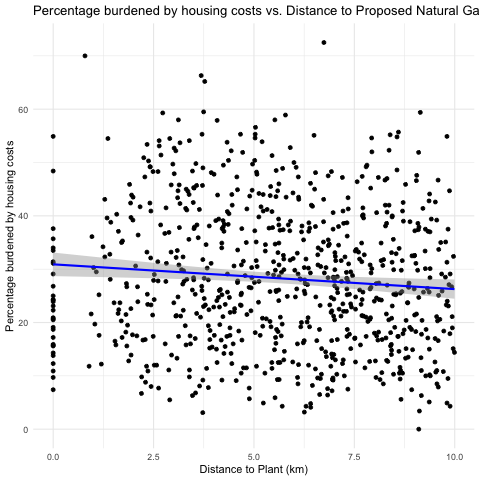

In [149]:
%%R

    ggplot(df_10_km) +
    aes(x=distance_to_plant, y=E_HOUBDN) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "Percentage burdened by housing costs vs. Distance to Proposed Natural Gas Plant Location, Tracts Within 10 Km",
            x = "Distance to Plant (km)",
            y = "Percentage burdened by housing costs"
          ) +
          theme_minimal()

In [147]:
%%R

model <- lm(distance_to_plant ~ E_HOUBDN, data=df_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_HOUBDN, data = df_20_km)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.2440  -3.4369  -0.6707   3.0140  11.9905 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.91726    0.30515  35.776   <2e-16 ***
E_HOUBDN    -0.09098    0.01040  -8.752   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.736 on 1173 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.0613,	Adjusted R-squared:  0.0605 
F-statistic: 76.61 on 1 and 1173 DF,  p-value: < 2.2e-16



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 3 rows containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`). 



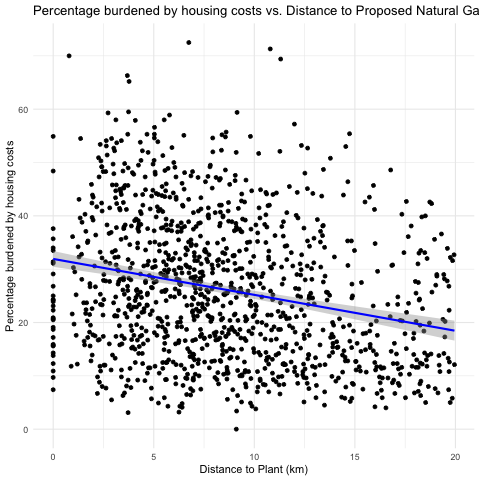

In [148]:
%%R

    ggplot(df_20_km) +
    aes(x=distance_to_plant, y=E_HOUBDN) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "Percentage burdened by housing costs vs. Distance to Proposed Natural Gas Plant Location, Tracts Within 20 Km",
            x = "Distance to Plant (km)",
            y = "Percentage burdened by housing costs"
          ) +
          theme_minimal()

## Percentage of households that make less than 75,000 who are considered burdened by housing costs (i.e., pay greater than 30% of monthly income on housing expenses) correlates with distance to proposed plant location in the 10km and 20km datasets

# Multivariate linear regressions

In [69]:
%%R

model <- lm(distance_to_plant ~ E_POV200 + E_AFAM + E_RENTER + E_UNINSUR + E_NOHSDP + E_LIMENG, data=df_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_POV200 + E_AFAM + E_RENTER + 
    E_UNINSUR + E_NOHSDP + E_LIMENG, data = df_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5714 -0.7928  0.1557  1.0983  2.4426 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.732256   0.174946  15.618  < 2e-16 ***
E_POV200    -0.007669   0.006978  -1.099  0.27263    
E_AFAM       0.009015   0.002990   3.015  0.00279 ** 
E_RENTER    -0.003784   0.004132  -0.916  0.36045    
E_UNINSUR    0.025470   0.020900   1.219  0.22393    
E_NOHSDP     0.001860   0.013800   0.135  0.89287    
E_LIMENG     0.018308   0.020605   0.889  0.37496    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.385 on 302 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.05515,	Adjusted R-squared:  0.03638 
F-statistic: 2.938 on 6 and 302 DF,  p-value: 0.008421



In [70]:
%%R

model <- lm(distance_to_plant ~ E_POV200 + E_AFAM + E_RENTER + E_UNINSUR + E_NOHSDP + E_LIMENG, data=df_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_POV200 + E_AFAM + E_RENTER + 
    E_UNINSUR + E_NOHSDP + E_LIMENG, data = df_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3431 -1.7143  0.1075  1.9735  5.3401 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.301560   0.192045  32.813  < 2e-16 ***
E_POV200    -0.024556   0.009118  -2.693 0.007230 ** 
E_AFAM       0.015935   0.003362   4.739 2.56e-06 ***
E_RENTER    -0.017555   0.004807  -3.652 0.000278 ***
E_UNINSUR    0.038817   0.025166   1.542 0.123374    
E_NOHSDP    -0.022705   0.017663  -1.285 0.199014    
E_LIMENG     0.012490   0.025819   0.484 0.628700    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.517 on 770 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.08054,	Adjusted R-squared:  0.07338 
F-statistic: 11.24 on 6 and 770 DF,  p-value: 4.685e-12



In [71]:
%%R

model <- lm(distance_to_plant ~ E_POV200 + E_AFAM + E_RENTER + E_UNINSUR + E_NOHSDP + E_LIMENG, data=df_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_POV200 + E_AFAM + E_RENTER + 
    E_UNINSUR + E_NOHSDP + E_LIMENG, data = df_20_km)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.6381  -3.1266  -0.6712   2.9257  13.1687 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.9504501  0.2681369  40.839  < 2e-16 ***
E_POV200    -0.0629174  0.0143202  -4.394 1.22e-05 ***
E_AFAM      -0.0001203  0.0050798  -0.024   0.9811    
E_RENTER    -0.0182271  0.0074093  -2.460   0.0140 *  
E_UNINSUR    0.0823694  0.0398891   2.065   0.0391 *  
E_NOHSDP    -0.0516978  0.0288891  -1.790   0.0738 .  
E_LIMENG    -0.0789323  0.0418932  -1.884   0.0598 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.63 on 1168 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.1068,	Adjusted R-squared:  0.1022 
F-statistic: 23.27 on 6 and 1168 DF,  p-value: < 2.2e-16



## In the multivariate linear regression in 20km, poverty remains significant. So does % renter. No high school diploma and people who speak English less than well are almost significant. Uninsured is signicant but opposite than expected.

In [164]:
%%R

model <- lm(distance_to_plant ~ E_POV200 + E_AFAM + + E_UNEMP + E_RENTER + E_UNINSUR + E_NOHSDP + E_LIMENG + E_PARK + E_AGE17 + E_AGE65 + EPL_ROAD + E_HOUBDN + E_PM + E_OZONE, data=df_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_POV200 + E_AFAM + +E_UNEMP + 
    E_RENTER + E_UNINSUR + E_NOHSDP + E_LIMENG + E_PARK + E_AGE17 + 
    E_AGE65 + EPL_ROAD + E_HOUBDN + E_PM + E_OZONE, data = df_20_km)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.3745  -2.7386  -0.3764   2.4285  12.4245 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  12.598568   1.832758   6.874 1.02e-11 ***
E_POV200     -0.065493   0.016919  -3.871 0.000114 ***
E_AFAM       -0.005296   0.005184  -1.022 0.307215    
E_UNEMP       0.030674   0.035999   0.852 0.394338    
E_RENTER     -0.008980   0.008270  -1.086 0.277815    
E_UNINSUR     0.038760   0.037220   1.041 0.297918    
E_NOHSDP     -0.003337   0.027078  -0.123 0.901927    
E_LIMENG     -0.120122   0.040759  -2.947 0.003271 ** 
E_PARK       -0.015614   0.018191  -0.858 0.390879    
E_AGE17       0.080321   0.022421   3.582 0.000354 ***
E_AGE65      -0.010843   0.018131  -0.598 0.549924    
EPL_ROAD   

## In this multivariate regression, what remained significant was poverty, % who speak English less than well, children 17 or younger (more, further away from plant), proximity to major road, and particulate matter- the strongest correlation

In [163]:
%%R

model <- lm(distance_to_plant ~ E_POV200 + E_AFAM + E_RENTER + E_LIMENG + E_AGE17 + EPL_ROAD + E_HOUBDN + E_PM + E_OZONE, data=df_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_POV200 + E_AFAM + E_RENTER + 
    E_LIMENG + E_AGE17 + EPL_ROAD + E_HOUBDN + E_PM + E_OZONE, 
    data = df_20_km)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.2121  -2.7427  -0.4048   2.4048  12.3707 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  10.963391   0.608138  18.028  < 2e-16 ***
E_POV200     -0.058038   0.013774  -4.214 2.71e-05 ***
E_AFAM       -0.004002   0.004852  -0.825 0.409602    
E_RENTER     -0.008396   0.007806  -1.076 0.282331    
E_LIMENG     -0.093180   0.023790  -3.917 9.49e-05 ***
E_AGE17       0.083801   0.020442   4.099 4.43e-05 ***
EPL_ROAD     -5.756213   0.845241  -6.810 1.56e-11 ***
E_HOUBDN      0.038087   0.019541   1.949 0.051522 .  
E_PM        -53.342305   4.567576 -11.678  < 2e-16 ***
E_OZONE       1.367527   0.407331   3.357 0.000813 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.232 on 1165 degrees of f

## ^ a slightly stronger model removing variables that were non-significant. Poverty, English learners, youth, near road, particulate matter and ozone still significant

In [165]:
%%R

model <- lm(distance_to_plant ~ E_PM + E_OZONE, data=df_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_PM + E_OZONE, data = df_20_km)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.3230  -3.1442  -0.7043   2.8383  11.0209 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   8.9301     0.2098  42.556  < 2e-16 ***
E_PM        -61.5667     4.6603 -13.211  < 2e-16 ***
E_OZONE       1.1735     0.4115   2.852  0.00443 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.506 on 1175 degrees of freedom
Multiple R-squared:  0.1507,	Adjusted R-squared:  0.1493 
F-statistic: 104.3 on 2 and 1175 DF,  p-value: < 2.2e-16



## Once you account for particulate matter, the relationship with ozone is no longer negative

In [166]:
%%R

model <- lm(distance_to_plant ~ E_POV200 + E_AFAM + E_RENTER + E_LIMENG + E_AGE17 + EPL_ROAD + E_HOUBDN + E_PM + E_OZONE, data=df_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_POV200 + E_AFAM + E_RENTER + 
    E_LIMENG + E_AGE17 + EPL_ROAD + E_HOUBDN + E_PM + E_OZONE, 
    data = df_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4181 -0.8102  0.1149  0.9904  3.0170 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.875579   0.403424   2.170 0.030766 *  
E_POV200     -0.015192   0.007372  -2.061 0.040184 *  
E_AFAM        0.007021   0.002897   2.423 0.015969 *  
E_RENTER     -0.009965   0.004463  -2.233 0.026293 *  
E_LIMENG      0.020457   0.012873   1.589 0.113087    
E_AGE17       0.013464   0.011155   1.207 0.228385    
EPL_ROAD      2.825889   0.604271   4.677 4.42e-06 ***
E_HOUBDN      0.025161   0.010874   2.314 0.021349 *  
E_PM        -10.667110   2.767661  -3.854 0.000142 ***
E_OZONE       0.775669   0.304777   2.545 0.011429 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.306 on 299 degrees of freedom
  (1 

## Within 5km, only poverty, AfAm (positive), % renting (negative), near road (positive), burdened by housing (positive), particulate matter (negative), and ozone (positive) still significant. This relates to earlier findings that the areas within 5km of a plant location, can have certain areas vulnerable in different ways than others but distance does not matter too much within this 5km radius. Further than that, it starts to matter a lot. PM however, is worse directly around the plant location.

In [167]:
%%R

model <- lm(distance_to_plant ~ E_POV200 + E_AFAM + E_RENTER + E_LIMENG + E_AGE17 + EPL_ROAD + E_HOUBDN + E_PM + E_OZONE, data=df_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_POV200 + E_AFAM + E_RENTER + 
    E_LIMENG + E_AGE17 + EPL_ROAD + E_HOUBDN + E_PM + E_OZONE, 
    data = df_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0658 -1.5853  0.0995  1.7389  7.0795 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.994496   0.448132  11.145  < 2e-16 ***
E_POV200     -0.040295   0.009068  -4.443 1.02e-05 ***
E_AFAM        0.008597   0.003269   2.630 0.008719 ** 
E_RENTER     -0.021479   0.005063  -4.242 2.49e-05 ***
E_LIMENG     -0.001570   0.014372  -0.109 0.913060    
E_AGE17       0.038233   0.013579   2.816 0.004995 ** 
EPL_ROAD     -0.123330   0.629405  -0.196 0.844704    
E_HOUBDN      0.047809   0.012673   3.773 0.000174 ***
E_PM        -28.070842   2.952486  -9.508  < 2e-16 ***
E_OZONE       1.488560   0.300092   4.960 8.67e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.347 on 767 degrees of freedom
  (2

In [176]:
%%R

model <- lm(distance_to_plant ~ E_POV200 + E_AFAM + E_RENTER + E_LIMENG + E_AGE17 + EPL_ROAD + E_HOUBDN + E_PM + E_OZONE, data=df_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_POV200 + E_AFAM + E_RENTER + 
    E_LIMENG + E_AGE17 + EPL_ROAD + E_HOUBDN + E_PM + E_OZONE, 
    data = df_20_km)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.2121  -2.7427  -0.4048   2.4048  12.3707 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  10.963391   0.608138  18.028  < 2e-16 ***
E_POV200     -0.058038   0.013774  -4.214 2.71e-05 ***
E_AFAM       -0.004002   0.004852  -0.825 0.409602    
E_RENTER     -0.008396   0.007806  -1.076 0.282331    
E_LIMENG     -0.093180   0.023790  -3.917 9.49e-05 ***
E_AGE17       0.083801   0.020442   4.099 4.43e-05 ***
EPL_ROAD     -5.756213   0.845241  -6.810 1.56e-11 ***
E_HOUBDN      0.038087   0.019541   1.949 0.051522 .  
E_PM        -53.342305   4.567576 -11.678  < 2e-16 ***
E_OZONE       1.367527   0.407331   3.357 0.000813 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.232 on 1165 degrees of f

## Within 10 km, poverty (negative), AfAm (positive), renting (negative), youth(positive), housing burdened (positive), PM (negative) and ozone(positive) are significant

In [178]:
%%R

# Check how many rows are complete for the model's predictors
sum(complete.cases(df_20_km[, c("E_POV200", "E_AFAM", "E_RENTER", "E_LIMENG", 
                                "E_AGE17", "EPL_ROAD", "E_HOUBDN", "E_PM", "E_OZONE")]))
nrow(df_20_km)  # Total rows for comparison

# Check missing values per column
colSums(is.na(df_20_km[, c("E_POV200", "E_AFAM", "E_RENTER", "E_LIMENG", 
                           "E_AGE17", "EPL_ROAD", "E_HOUBDN", "E_PM", "E_OZONE")]))


E_POV200   E_AFAM E_RENTER E_LIMENG  E_AGE17 EPL_ROAD E_HOUBDN     E_PM 
       3        1        3        1        1        0        3        0 
 E_OZONE 
       0 


In [179]:
%%R
# Count how many predictions are made
complete_rows <- complete.cases(df_20_km[, c("E_POV200", "E_AFAM", "E_RENTER", 
                                             "E_LIMENG", "E_AGE17", "EPL_ROAD", 
                                             "E_HOUBDN", "E_PM", "E_OZONE")])
sum(complete_rows)

# Assign predictions
df_20_km$predicted_distance_to_plant <- NA
df_20_km$predicted_distance_to_plant[complete_rows] <- predict(model, newdata = df_20_km[complete_rows, ])

# View sample
df_20_km %>% 
  select(GEOID, E_POV200, predicted_distance_to_plant) %>% 
  head(10)

        GEOID E_POV200 predicted_distance_to_plant
1  2.4001e+10  30.4510                    9.354554
2  2.4001e+10  51.3224                    7.185609
3  2.4001e+10  36.7010                    9.515397
4  2.4001e+10  57.8800                    9.259079
5  2.4001e+10  60.9553                    9.222015
6  2.4001e+10  55.0079                    7.370995
7  2.4001e+10  40.1968                    7.047222
8  2.4001e+10  10.9264                    9.198018
9  2.4001e+10  36.2318                    6.193248
10 2.4001e+10  26.7630                    9.394035


In [184]:
%%R

# Create a vector of NA values for predictions
df_20_km$predicted_distance_to_plant <- NA

# Identify complete cases
complete_rows <- complete.cases(df_20_km[, c("E_POV200", "E_AFAM", "E_RENTER", 
                                             "E_LIMENG", "E_AGE17", "EPL_ROAD", 
                                             "E_HOUBDN", "E_PM", "E_OZONE")])

# Assign predictions only to complete rows
df_20_km$predicted_distance_to_plant[complete_rows] <- predict(model, newdata = df_20_km[complete_rows, ])

# View all relevant columns
df_20_km %>% 
  select(GEOID, Band, E_POV200, E_AFAM, E_RENTER, E_LIMENG, E_AGE17, 
         EPL_ROAD, E_HOUBDN, E_PM, E_OZONE, predicted_distance_to_plant) %>% 
  head(10)

        GEOID Band E_POV200 E_AFAM E_RENTER E_LIMENG E_AGE17 EPL_ROAD E_HOUBDN
1  2.4001e+10    1  30.4510   19.2     13.8      1.3    12.3   0.2353     20.9
2  2.4001e+10    3  51.3224   19.4     40.4      1.1    17.2   0.4320     20.1
3  2.4001e+10    2  36.7010    1.6     29.5      0.0    23.6   0.3232     21.5
4  2.4001e+10    2  57.8800    1.8     51.2      0.3    26.0   0.2643     38.4
5  2.4001e+10    2  60.9553    1.2     52.2      0.0    21.6   0.2708     52.2
6  2.4001e+10    3  55.0079    4.0     57.5      0.8    20.2   0.5200     38.7
7  2.4001e+10    3  40.1968    4.2     56.5      0.0    15.8   0.6136     29.3
8  2.4001e+10    3  10.9264    0.7     14.7      0.0    13.9   0.4901     17.1
9  2.4001e+10    3  36.2318   43.7     29.1      1.1     7.0   0.6136     21.0
10 2.4001e+10    4  26.7630    1.4     10.1      0.3    20.4   0.3659     13.1
   E_PM E_OZONE predicted_distance_to_plant
1     0       0                    9.354554
2     0       0                    7.185609

In [186]:
%%R

# Get residuals only for complete cases
df_20_km$residuals <- NA  # Initialize with NA
df_20_km$residuals[complete_rows] <- resid(model)

# View selected columns sorted by residuals
df_20_km %>% 
  select(GEOID, Band, E_POV200, E_AFAM, E_RENTER, E_LIMENG, E_AGE17, 
         EPL_ROAD, E_HOUBDN, E_PM, E_OZONE, 
         predicted_distance_to_plant, residuals) %>% 
  arrange(residuals) %>% 
  head(50)

         GEOID Band E_POV200 E_AFAM E_RENTER E_LIMENG E_AGE17 EPL_ROAD E_HOUBDN
1  24005492600    1  22.8294   25.5     43.0      0.0    25.3   0.2394     34.0
2  24033800900    1  14.0274   33.4     17.3      0.0    21.8   0.0000      7.4
3  24039930500    1  22.7049    8.6      6.6      0.6    18.1   0.0000     24.2
4  24031700500    1   9.2247    2.9      8.8      3.8    22.1   0.1026     14.3
5  24017851200    1  13.7586   10.8     17.9      0.8    23.9   0.2319     24.3
6  24017850904    1   5.0412   67.5     19.0      0.8    24.8   0.2357     15.7
7  24045010300    1  22.0632   16.0     27.5      3.0    29.9   0.2831     25.0
8  24025302400    1  29.3619   39.3     40.3      2.7    26.2   0.3925     22.3
9  24019970100    1  27.5764   19.2     12.9      0.4    18.1   0.1607     23.1
10 24033801003    1  12.4690   77.7      5.8      0.8    20.8   0.2742     13.8
11 24005411202    2   5.6617    4.7     14.0      0.0    26.0   0.0000     12.5
12 24047951000    1  27.5092   22.7     

# Asthma and proposed plant locations

In [62]:
%%R

model <- lm(distance_to_plant ~ E_ASTHMA, data=df_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_ASTHMA, data = df_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0771 -0.9077  0.2625  1.1596  2.0627 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.39116    0.49472   4.833 2.12e-06 ***
E_ASTHMA     0.04698    0.04229   1.111    0.267    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.411 on 307 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.004005,	Adjusted R-squared:  0.0007604 
F-statistic: 1.234 on 1 and 307 DF,  p-value: 0.2674



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 1 row containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 1 row containing missing values or values outside the scale range
(`geom_point()`). 



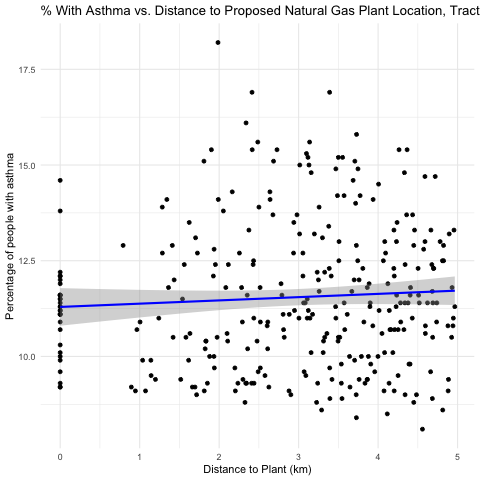

In [65]:
%%R

    ggplot(df_5_km) +
    aes(x=distance_to_plant, y=E_ASTHMA) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "% With Asthma vs. Distance to Proposed Natural Gas Plant Location, Tracts Within 5 Km",
            x = "Distance to Plant (km)",
            y = "Percentage of people with asthma"
          ) +
          theme_minimal()

In [63]:
%%R

model <- lm(distance_to_plant ~ E_ASTHMA, data=df_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_ASTHMA, data = df_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8963 -1.9763  0.1142  2.1718  4.5840 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.02035    0.66493   10.56   <2e-16 ***
E_ASTHMA    -0.12218    0.05818   -2.10   0.0361 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.609 on 775 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.005657,	Adjusted R-squared:  0.004374 
F-statistic: 4.409 on 1 and 775 DF,  p-value: 0.03607



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`). 



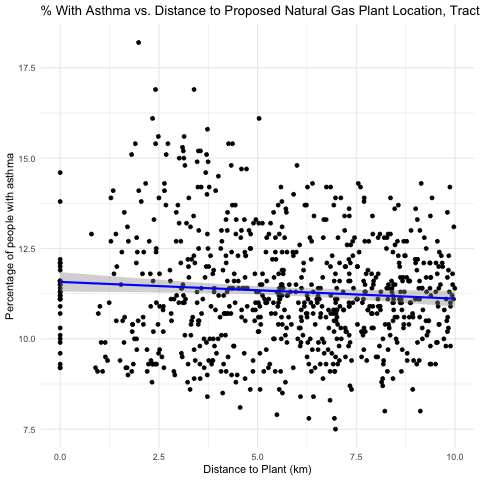

In [66]:
%%R

    ggplot(df_10_km) +
    aes(x=distance_to_plant, y=E_ASTHMA) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "% With Asthma vs. Distance to Proposed Natural Gas Plant Location, Tracts Within 10 Km",
            x = "Distance to Plant (km)",
            y = "Percentage of people with asthma"
          ) +
          theme_minimal()

In [64]:
%%R

model <- lm(distance_to_plant ~ E_ASTHMA, data=df_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_ASTHMA, data = df_20_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6797 -3.3798 -0.5892  3.1381 12.1160 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 15.10251    1.04319  14.477  < 2e-16 ***
E_ASTHMA    -0.58944    0.09285  -6.348  3.1e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.806 on 1174 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.03319,	Adjusted R-squared:  0.03237 
F-statistic:  40.3 on 1 and 1174 DF,  p-value: 3.103e-10



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`). 



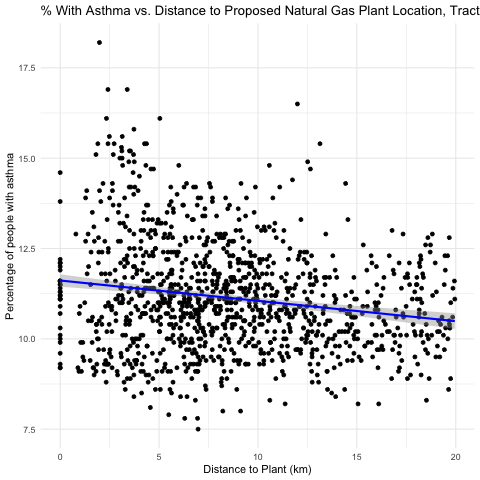

In [67]:
%%R

    ggplot(df_20_km) +
    aes(x=distance_to_plant, y=E_ASTHMA) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "% With Asthma vs. Distance to Proposed Natural Gas Plant Location, Tracts Within 20 Km",
            x = "Distance to Plant (km)",
            y = "Percentage of people with asthma"
          ) +
          theme_minimal()

## People have higher rates of asthma closer to proposed plant locations (highest appears around 2.5km from a plant)

In [72]:
%%R

model <- lm(distance_to_plant ~ E_ASTHMA + E_POV200, data=df_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_ASTHMA + E_POV200, data = df_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2150 -0.9106  0.2676  1.1643  2.2731 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  1.764193   0.708798   2.489   0.0133 *
E_ASTHMA     0.125849   0.076638   1.642   0.1016  
E_POV200    -0.009273   0.007509  -1.235   0.2178  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.412 on 305 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.008954,	Adjusted R-squared:  0.002455 
F-statistic: 1.378 on 2 and 305 DF,  p-value: 0.2537



In [73]:
%%R

model <- lm(distance_to_plant ~ E_ASTHMA + E_POV200, data=df_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_ASTHMA + E_POV200, data = df_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9402 -1.7881  0.3064  2.0246  4.8776 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.66470    0.85600   4.281 2.09e-05 ***
E_ASTHMA     0.29733    0.08987   3.309 0.000981 ***
E_POV200    -0.05212    0.00865  -6.025 2.61e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.551 on 773 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.05023,	Adjusted R-squared:  0.04777 
F-statistic: 20.44 on 2 and 773 DF,  p-value: 2.238e-09



In [74]:
%%R

model <- lm(distance_to_plant ~ E_ASTHMA + E_POV200, data=df_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_ASTHMA + E_POV200, data = df_20_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.253  -3.230  -0.676   2.821  12.796 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.33982    1.37610   4.607 4.53e-06 ***
E_ASTHMA     0.46640    0.14428   3.233  0.00126 ** 
E_POV200    -0.12635    0.01356  -9.319  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.64 on 1171 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.09971,	Adjusted R-squared:  0.09817 
F-statistic: 64.85 on 2 and 1171 DF,  p-value: < 2.2e-16



## After controlling for poverty, asthma rates are higher further away from proposed plant locations. But asthma alone is higher closer to proposed plant locations. So poverty mainly explains the higher asthma rates closer to proposed plant locations.

In [75]:
%%R

model <- lm(distance_to_plant ~ E_PM, data=df_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_PM, data = df_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1144 -0.7679  0.2734  1.0800  2.2474 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.1144     0.1029  30.275  < 2e-16 ***
E_PM         -4.7973     1.7403  -2.757  0.00619 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.394 on 308 degrees of freedom
Multiple R-squared:  0.02408,	Adjusted R-squared:  0.02091 
F-statistic: 7.599 on 1 and 308 DF,  p-value: 0.006189



`geom_smooth()` using formula = 'y ~ x'


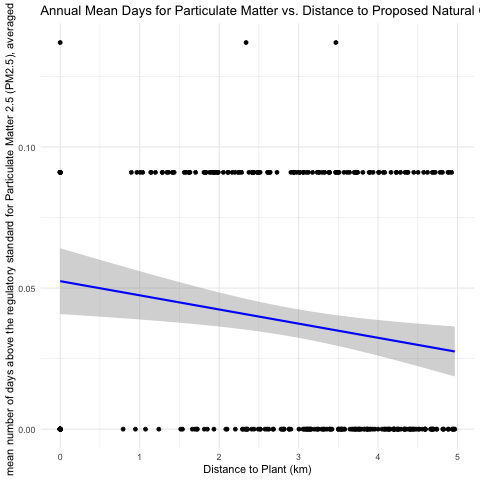

In [79]:
%%R

    ggplot(df_5_km) +
    aes(x=distance_to_plant, y=E_PM) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "Annual Mean Days for Particulate Matter vs. Distance to Proposed Natural Gas Plant Location, Tracts Within 5 Km",
            x = "Distance to Plant (km)",
            y = "The annual mean number of days above the regulatory standard for Particulate Matter 2.5 (PM2.5), averaged over 3-years"
          ) +
          theme_minimal()

In [76]:
%%R

model <- lm(distance_to_plant ~ E_PM, data=df_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_PM, data = df_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.1232 -1.7894  0.1313  1.9314  5.8413 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.1232     0.1017  60.198   <2e-16 ***
E_PM        -21.6630     2.2281  -9.723   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.469 on 777 degrees of freedom
Multiple R-squared:  0.1085,	Adjusted R-squared:  0.1073 
F-statistic: 94.53 on 1 and 777 DF,  p-value: < 2.2e-16



`geom_smooth()` using formula = 'y ~ x'


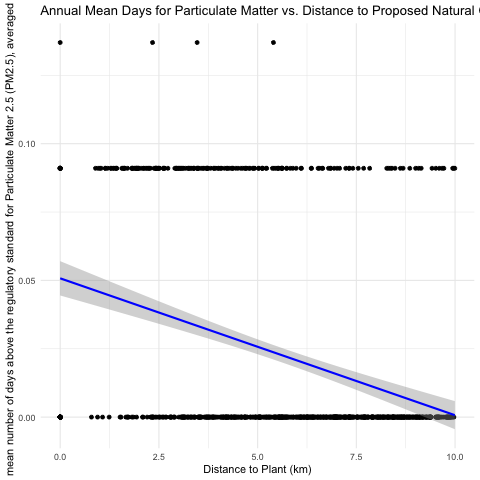

In [80]:
%%R

    ggplot(df_10_km) +
    aes(x=distance_to_plant, y=E_PM) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "Annual Mean Days for Particulate Matter vs. Distance to Proposed Natural Gas Plant Location, Tracts Within 10 Km",
            x = "Distance to Plant (km)",
            y = "The annual mean number of days above the regulatory standard for Particulate Matter 2.5 (PM2.5), averaged over 3-years"
          ) +
          theme_minimal()

In [77]:
%%R

model <- lm(distance_to_plant ~ E_PM, data=df_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_PM, data = df_20_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.3658 -3.1130 -0.6843  2.9382 10.5852 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.3658     0.1443   64.91   <2e-16 ***
E_PM        -53.9037     3.8190  -14.11   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.519 on 1176 degrees of freedom
Multiple R-squared:  0.1449,	Adjusted R-squared:  0.1441 
F-statistic: 199.2 on 1 and 1176 DF,  p-value: < 2.2e-16



`geom_smooth()` using formula = 'y ~ x'


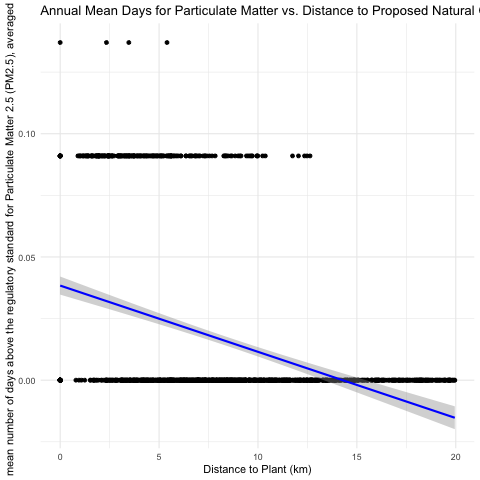

In [159]:
%%R

    ggplot(df_20_km) +
    aes(x=distance_to_plant, y=E_PM) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "Annual Mean Days for Particulate Matter vs. Distance to Proposed Natural Gas Plant Location, Tracts Within 20 Km",
            x = "Distance to Plant (km)",
            y = "The annual mean number of days above the regulatory standard for Particulate Matter 2.5 (PM2.5), averaged over 3-years"
          ) +
          theme_minimal()

## Tracts closer to proposed plant locations have higher annual mean number of days above the regulatory standard for Particulate Matter 2.5 (PM2.5), averaged over 3-years. So, they are already more vulnerable to air pollution.

In [156]:
%%R

model <- lm(distance_to_plant ~ E_OZONE, data=df_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_OZONE, data = df_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9961 -0.8899  0.2688  1.1621  2.0777 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.9961     0.1327  22.569   <2e-16 ***
E_OZONE      -0.1119     0.1890  -0.592    0.554    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.411 on 308 degrees of freedom
Multiple R-squared:  0.001136,	Adjusted R-squared:  -0.002107 
F-statistic: 0.3502 on 1 and 308 DF,  p-value: 0.5544



In [157]:
%%R

model <- lm(distance_to_plant ~ E_OZONE, data=df_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_OZONE, data = df_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9448 -1.9510  0.1884  2.1478  4.8297 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.9448     0.1503  39.562  < 2e-16 ***
E_OZONE      -0.6114     0.2323  -2.631  0.00867 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.603 on 777 degrees of freedom
Multiple R-squared:  0.008832,	Adjusted R-squared:  0.007557 
F-statistic: 6.924 on 1 and 777 DF,  p-value: 0.008674



`geom_smooth()` using formula = 'y ~ x'


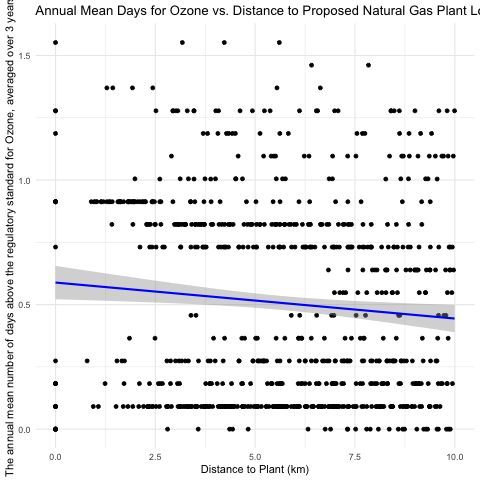

In [162]:
%%R

    ggplot(df_10_km) +
    aes(x=distance_to_plant, y=E_OZONE) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "Annual Mean Days for Ozone vs. Distance to Proposed Natural Gas Plant Location, Tracts Within 10 Km",
            x = "Distance to Plant (km)",
            y = "The annual mean number of days above the regulatory standard for Ozone, averaged over 3 years"
          ) +
          theme_minimal()

In [158]:
%%R

model <- lm(distance_to_plant ~ E_OZONE, data=df_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_OZONE, data = df_20_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.4589 -3.6965 -0.6691  3.2030 12.3723 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.4589     0.2207  42.865  < 2e-16 ***
E_OZONE      -1.9612     0.3602  -5.445 6.29e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.827 on 1176 degrees of freedom
Multiple R-squared:  0.0246,	Adjusted R-squared:  0.02377 
F-statistic: 29.65 on 1 and 1176 DF,  p-value: 6.286e-08



`geom_smooth()` using formula = 'y ~ x'


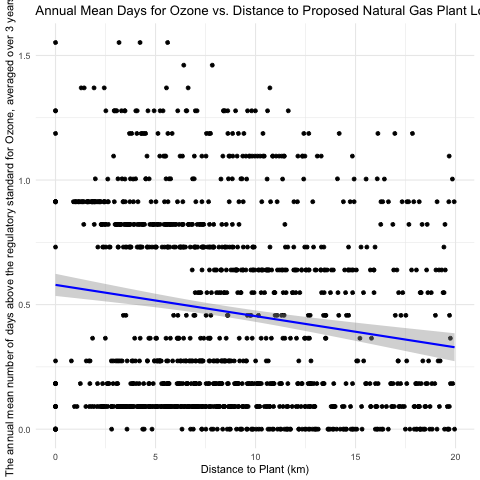

In [161]:
%%R

    ggplot(df_20_km) +
    aes(x=distance_to_plant, y=E_OZONE) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "Annual Mean Days for Ozone vs. Distance to Proposed Natural Gas Plant Location, Tracts Within 20 Km",
            x = "Distance to Plant (km)",
            y = "The annual mean number of days above the regulatory standard for Ozone, averaged over 3 years"
          ) +
          theme_minimal()

## Ozone also decreases the further away from the proposed plants you get, other than within 5km which is pretty similar

# Coronary heart disease and distance to proposed plant location

In [82]:
%%R

model <- lm(distance_to_plant ~ E_CHD, data=df_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_CHD, data = df_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2023 -0.8569  0.2964  1.0952  2.2216 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.46315    0.24155  10.197   <2e-16 ***
E_CHD        0.07700    0.03732   2.063   0.0399 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.404 on 307 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.01368,	Adjusted R-squared:  0.01047 
F-statistic: 4.257 on 1 and 307 DF,  p-value: 0.03992



In [83]:
%%R

model <- lm(distance_to_plant ~ E_CHD, data=df_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_CHD, data = df_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7602 -2.0158  0.1235  2.1549  4.3176 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.43172    0.31803  17.079   <2e-16 ***
E_CHD        0.03422    0.05041   0.679    0.497    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.615 on 775 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.0005944,	Adjusted R-squared:  -0.0006952 
F-statistic: 0.4609 on 1 and 775 DF,  p-value: 0.4974



In [84]:
%%R

model <- lm(distance_to_plant ~ E_CHD, data=df_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_CHD, data = df_20_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6959 -3.7510 -0.6764  3.1377 11.4829 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.80755    0.50538  17.428   <2e-16 ***
E_CHD       -0.04466    0.08093  -0.552    0.581    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.887 on 1174 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.0002593,	Adjusted R-squared:  -0.0005922 
F-statistic: 0.3045 on 1 and 1174 DF,  p-value: 0.5812



## Coronary heart disease is not associated with distance to proposed plant location

In [86]:
%%R

model <- lm(distance_to_plant ~ E_CANCER, data=df_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_CANCER, data = df_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0322 -0.8862  0.3032  1.1157  2.0945 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.78252    0.21842  12.739   <2e-16 ***
E_CANCER     0.02312    0.03110   0.743    0.458    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.412 on 307 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.001797,	Adjusted R-squared:  -0.001454 
F-statistic: 0.5528 on 1 and 307 DF,  p-value: 0.4578



In [87]:
%%R

model <- lm(distance_to_plant ~ E_CANCER, data=df_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_CANCER, data = df_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.1289 -1.9517  0.2165  2.1661  4.5018 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.82424    0.26766  18.024  < 2e-16 ***
E_CANCER     0.12081    0.03725   3.243  0.00123 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.598 on 775 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.01339,	Adjusted R-squared:  0.01212 
F-statistic: 10.52 on 1 and 775 DF,  p-value: 0.001232



In [88]:
%%R

model <- lm(distance_to_plant ~ E_CANCER, data=df_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ E_CANCER, data = df_20_km)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.3767  -3.5776  -0.6033   2.9021  12.4540 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.91192    0.41404  14.278  < 2e-16 ***
E_CANCER     0.37301    0.05531   6.744 2.42e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.796 on 1174 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.03729,	Adjusted R-squared:  0.03647 
F-statistic: 45.48 on 1 and 1174 DF,  p-value: 2.419e-11



## Cancer rates are higher in tracts further away from proposed plant locations (could be associated with higher wealth?)

In [94]:
%%R

model <- lm(distance_to_plant ~ SPL_EBM_DOM1, data=df_5_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ SPL_EBM_DOM1, data = df_5_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9618 -0.8903  0.2857  1.1565  2.0479 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.85999    0.26563   10.77   <2e-16 ***
SPL_EBM_DOM1  0.03566    0.12296    0.29    0.772    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.411 on 308 degrees of freedom
Multiple R-squared:  0.0002729,	Adjusted R-squared:  -0.002973 
F-statistic: 0.08409 on 1 and 308 DF,  p-value: 0.772



`geom_smooth()` using formula = 'y ~ x'


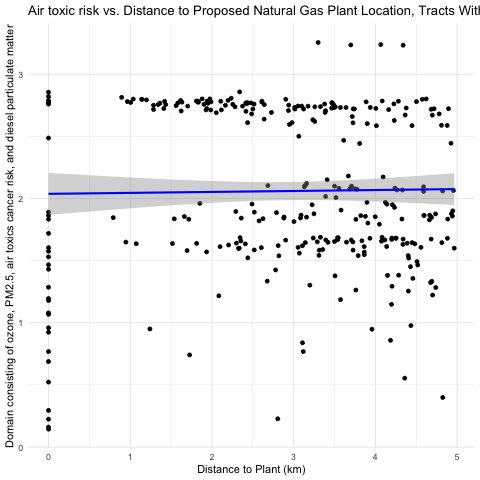

In [99]:
%%R

    ggplot(df_5_km) +
    aes(x=distance_to_plant, y=SPL_EBM_DOM1) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "Air toxic risk vs. Distance to Proposed Natural Gas Plant Location, Tracts Within 5 Km",
            x = "Distance to Plant (km)",
            y = "Domain consisting of ozone, PM2.5, air toxics cancer risk, and diesel particulate matter"
          ) +
          theme_minimal()

In [95]:
%%R

model <- lm(distance_to_plant ~ SPL_EBM_DOM1, data=df_10_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ SPL_EBM_DOM1, data = df_10_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3124 -1.8518  0.1905  2.0636  5.1525 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    7.4490     0.3173  23.478  < 2e-16 ***
SPL_EBM_DOM1  -0.9479     0.1587  -5.974 3.52e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.558 on 776 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.04397,	Adjusted R-squared:  0.04274 
F-statistic: 35.69 on 1 and 776 DF,  p-value: 3.522e-09



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 1 row containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 1 row containing missing values or values outside the scale range
(`geom_point()`). 



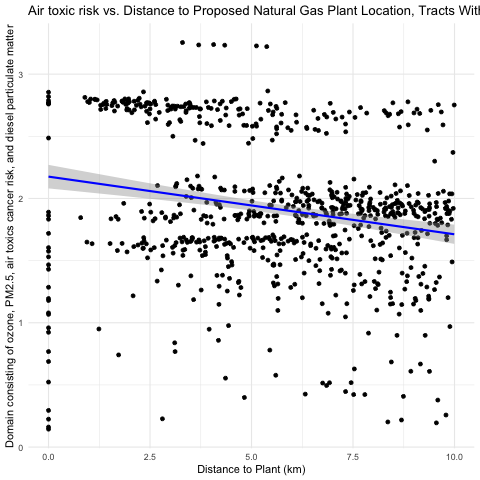

In [98]:
%%R

    ggplot(df_10_km) +
    aes(x=distance_to_plant, y=SPL_EBM_DOM1) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "Air toxic risk vs. Distance to Proposed Natural Gas Plant Location, Tracts Within 10 Km",
            x = "Distance to Plant (km)",
            y = "Domain consisting of ozone, PM2.5, air toxics cancer risk, and diesel particulate matter"
          ) +
          theme_minimal()

In [96]:
%%R

model <- lm(distance_to_plant ~ SPL_EBM_DOM1, data=df_20_km)
summary(model)


Call:
lm(formula = distance_to_plant ~ SPL_EBM_DOM1, data = df_20_km)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.517  -3.220  -0.570   2.953  13.382 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   13.9534     0.4338   32.17   <2e-16 ***
SPL_EBM_DOM1  -3.0295     0.2308  -13.12   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.565 on 1175 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.1278,	Adjusted R-squared:  0.1271 
F-statistic: 172.2 on 1 and 1175 DF,  p-value: < 2.2e-16



`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 1 row containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 1 row containing missing values or values outside the scale range
(`geom_point()`). 



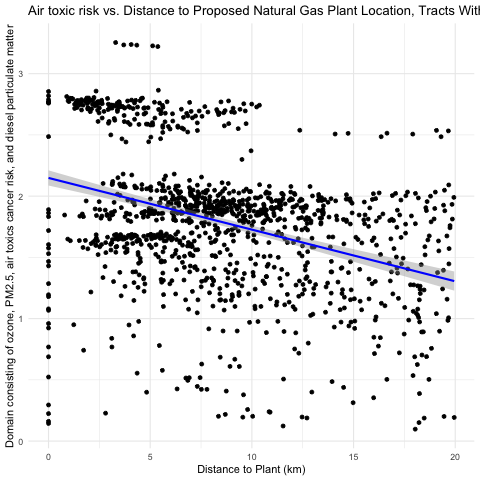

In [97]:
%%R

    ggplot(df_20_km) +
    aes(x=distance_to_plant, y=SPL_EBM_DOM1) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, color = "blue") +
          labs(
            title = "Air toxic risk vs. Distance to Proposed Natural Gas Plant Location, Tracts Within 20 Km",
            x = "Distance to Plant (km)",
            y = "Domain consisting of ozone, PM2.5, air toxics cancer risk, and diesel particulate matter"
          ) +
          theme_minimal()

## Domain consisting of ozone, PM2.5, air toxics cancer risk, and diesel particulate matter goes down with increasing distance away from proposed plants, except within 5km where it's all similar